<a href="https://colab.research.google.com/github/SGhuman123/Data-Science-Portfolio/blob/main/Udemy%20TensorFlow%20Developer%20Certificate%20Bootcamp/Section%208%20Introduction%20to%20NLP/08_Kaggle_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-12f40f04-bbc9-1ec9-4eb3-d94065fede50)


## Get helper functions

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-01-20 23:29:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-01-20 23:29:52 (13.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functios for the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

See the original source here: https://www.kaggle.com/competitions/nlp-getting-started

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip the data
unzip_data("nlp_getting_started.zip")

--2024-01-20 23:29:59--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 173.194.174.207, 108.177.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   939KB/s    in 0.6s    

2024-01-20 23:30:00 (939 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first have to read them in, one way to do so would be to use Python: https://realpython.com/read-write-files-python/
But I prefer to get visual straight away.

So another way to do this is to use pandas...

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
# train_df.head()

## Preprocessing the data

In [ ]:
# import re
# # Create a function to clean text data
# def preprocessor(text):

#   # Remove all html markup from a tweet
#   text = re.sub('<[^>]*>', '', text)

#   # Remove @username from a tweet
#   text = re.sub(r"@[^\s]+",'', text)

#   # Remove http links from a tweet
#   text = re.sub('http[^\s]+', '', text)

#   # Find all emoticons and store them temporarily
#   emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)

#   # Remove all non-word characters, make all words to lower case, and add back the stored emoticons
#   text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
#   return text

In [ ]:
# train_df["text"] = train_df["text"].apply(preprocessor)
# test_df["text"] = test_df["text"].apply(preprocessor)
# train_df.head()

### Split data into training and validation sets

In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
# train_df_shuffled.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,  # use 10% of training data for validation split
                                                                            random_state=42)

In [ ]:
# What does the test dataframe look like?
# test_df.head()

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVctorization parameters
text_vectorizer = TextVectorization(max_tokens=10000, # How many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None, # how long do you want your sequences to be?
                                    pad_to_max_tokens=True)

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split(" ")) for i in train_sentences]) / len(train_sentences))

15

In [ ]:
max([len(i.split(" ")) for i in train_sentences] )

31

In [ ]:
from collections import Counter

# Count the frequency of each number of tokens in the training tweets
token_counts = Counter([len(sentence.split(" ")) for sentence in train_sentences])

# Find the most common number of tokens
most_common_tokens, count = token_counts.most_common(1)[0]

print(f"Most frequent number of tokens: {most_common_tokens}, Occurs {count} times")

Most frequent number of tokens: 17, Occurs 449 times


In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 31 # max length our sequences will be (e.g. how mant words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer(sample_sentence)

<tf.Tensor: shape=(31,), dtype=int64, numpy=
array([264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0])>

In [ ]:
# # Choose a random sentence from the training dataset and tokenize it
# random_sentence = random.choice(train_sentences)
# print(f"Original text:\n {random_sentence}\
#         \n\nVectorized text:\n {text_vectorizer(random_sentence)}")

In [ ]:
# # Get the unique words in the vocabulary
# words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
# top_5_words = words_in_vocab[:5] # get the most common words
# bottom_5_words = words_in_vocab[-5:] # get the least common words
# print(f"Number of words in vocab: {len(words_in_vocab)}")
# print(f"5 most common words: {top_5_words}")
# print(f"5 least common words: {bottom_5_words}")

In [ ]:
# train_sentences

### Creating an Embedding using an Embedding Layer

To make our embedding, we're going to use TensorFlow's embedding layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128,
                             embeddings_initializer="uniform",
                            #  input_length=max_vocab_length # how long is each input
                             input_length=max_length # how long is each input
                             )

embedding

In [ ]:
# # Get a random sentence from the training set
# random_sentence = random.choice(train_sentences)
# print(f"Original text:\n {random_sentence}\n\nEmbedded version:")

# # Embed the random sentence (turn it into dense vectors of fixed size)
# sample_embed = embedding(text_vectorizer([random_sentence]))
# sample_embed

In [ ]:
# # Check out a single token's embedding
# sample_embed[0][0], sample_embed[0][0].shape, random_sentence

### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics every time, however, this will be cumbersome and could easily be fixed with a function.

Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

For a deep overview of many different evaluation methods, see the Sklearn documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculate model accuracy, precision, recall and f1 score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

## 2. Create 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
# len(train_labels_10_percent)

In [ ]:
import numpy as np

# Check the number of each label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# len(train_df_shuffled)

In [ ]:
# Check the number of targets in our subset of data
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder: https://tfhub.dev/google/universal-sentence-encoder/4

See how th USE was created here: https://arxiv.org/abs/1803.11175

## Potential ideas:
* Try trainable = False of 100% of the data WORKS!!!
* Change the optimizer type try: RMSprop? WORKS (very marginal)!!!
* Find the ideal learning rate? Use learning rate callback? WORKS (very marginal)!!!
* Batching - No
* Add in LSTM or bidirectional LSTM layer - No
* [Augment the data](https://www.youtube.com/watch?v=lpWewl7y57o)

### Model USE 100%: Universal Sentence Encoder model with 100% of the training data?

* Try trainable = False of 100% of the data WORKS!!!

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2")
embed_samples = embed([sample_sentence,
                       "When you can the universial sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_USE_100_percent = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_USE_10_percent")

# Compile
model_USE_100_percent.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_USE_100_percent.summary()

Model: "model_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit the model to the 10% training data subsets
model_USE_100_percent_history = model_USE_100_percent.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_100_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_100_percent_correct_split/20240120-233152
Epoch 1/5
215/215 [==============================] - 6s 11ms/step - loss: 0.5033 - accuracy: 0.7901 - val_loss: 0.4475 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4147 - accuracy: 0.8140 - val_loss: 0.4375 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4006 - accuracy: 0.8222 - val_loss: 0.4358 - val_accuracy: 0.8228
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3913 - accuracy: 0.8244 - val_loss: 0.4291 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3835 - accuracy: 0.8307 - val_loss: 0.4258 - val_accuracy: 0.8163


In [ ]:
# Make predictions with the model trained on 100% of the data
model_USE_100_percent_pred_probs = model_USE_100_percent.predict(val_sentences)
model_USE_100_percent_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.1866785 ],
       [0.78342026],
       [0.9883609 ],
       [0.21520786],
       [0.70397675],
       [0.7347604 ],
       [0.98208076],
       [0.98008245],
       [0.93781817],
       [0.10139417]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_USE_100_percent_preds = tf.squeeze(tf.round(model_USE_100_percent_pred_probs))
model_USE_100_percent_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model_USE_10_percent predictions
model_USE_100_percent_results = calculate_results(y_true=val_labels,
                                    y_pred=model_USE_100_percent_preds)
model_USE_100_percent_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

### Model USE 100%: Universal Sentence Encoder model with 100% of the training data?

### Change the optimizer type try: RMSprop? WORKS (very marginal)!!!!!!


In [ ]:
# Create model using the Sequential API
model_USE_RMS_100_percent = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_USE_RMS_100_percent")

# Compile
model_USE_RMS_100_percent.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics=["accuracy"])

model_USE_RMS_100_percent.summary()

Model: "model_USE_RMS_100_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit the model to the 100% training data subsets
model_USE_RMS_100_percent_history = model_USE_RMS_100_percent.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_RMS_100_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_RMS_100_percent_correct_split/20240120-233225
Epoch 1/5
215/215 [==============================] - 4s 11ms/step - loss: 0.5258 - accuracy: 0.7825 - val_loss: 0.4586 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4218 - accuracy: 0.8116 - val_loss: 0.4422 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4054 - accuracy: 0.8187 - val_loss: 0.4372 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3971 - accuracy: 0.8248 - val_loss: 0.4333 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3915 - accuracy: 0.8256 - val_loss: 0.4287 - val_accuracy: 0.8150


In [ ]:
# Make predictions with the model trained on 100% of the data
model_USE_RMS_100_percent_pred_probs = model_USE_RMS_100_percent.predict(val_sentences)
model_USE_RMS_100_percent_pred_probs[:10]

24/24 [==============================] - 0s 7ms/step


array([[0.17260325],
       [0.77842337],
       [0.9861196 ],
       [0.195128  ],
       [0.74719113],
       [0.73109883],
       [0.9788811 ],
       [0.9757549 ],
       [0.93953717],
       [0.10727076]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_USE_RMS_100_percent_preds = tf.squeeze(tf.round(model_USE_RMS_100_percent_pred_probs))
model_USE_RMS_100_percent_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model_USE_10_percent predictions
model_USE_RMS_100_percent_results = calculate_results(y_true=val_labels,
                                    y_pred=model_USE_RMS_100_percent_preds)
model_USE_RMS_100_percent_results

{'accuracy': 81.49606299212599,
 'precision': 0.8157643862730394,
 'recall': 0.8149606299212598,
 'f1': 0.8139865765354786}

In [ ]:
model_USE_100_percent_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

### We observe a slight decrease in f1-score so we shall stick with Adam optimizer

### Model USE 100%: Universal Sentence Encoder model with 100% of the training data?

* Change the optimizer type try: RMSprop? WORKS (very marginal)!!!!!!
* Find the ideal learning rate? Use learning rate callback? WORKS (very marginal)!!!

In [ ]:
# Create model using the Sequential API
model_USE_Adam_LR_100_percent = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_USE_Adam_100_percent")

# Compile
model_USE_Adam_LR_100_percent.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_USE_Adam_LR_100_percent.summary()

Model: "model_USE_Adam_100_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/5))

# Fit the model
model_USE_Adam_LR_100_percent_history = model_USE_Adam_LR_100_percent.fit(train_sentences,
                                                                        train_labels,
                                                                        epochs=10,
                                                                        steps_per_epoch=len(train_sentences),
                                                                        validation_data=(val_sentences, val_labels),
                                                                        callbacks=[lr_scheduler])

Epoch 1/10
6851/6851 [==============================] - 44s 6ms/step - loss: 0.4483 - accuracy: 0.8000 - val_loss: 0.4336 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 2/10
6851/6851 [==============================] - 42s 6ms/step - loss: 0.4078 - accuracy: 0.8228 - val_loss: 0.4313 - val_accuracy: 0.8045 - lr: 0.0016
Epoch 3/10
6851/6851 [==============================] - 42s 6ms/step - loss: 0.3863 - accuracy: 0.8330 - val_loss: 0.4305 - val_accuracy: 0.8215 - lr: 0.0025
Epoch 4/10
6851/6851 [==============================] - 42s 6ms/step - loss: 0.3694 - accuracy: 0.8437 - val_loss: 0.4639 - val_accuracy: 0.7953 - lr: 0.0040
Epoch 5/10
6851/6851 [==============================] - 42s 6ms/step - loss: 0.3525 - accuracy: 0.8513 - val_loss: 0.4699 - val_accuracy: 0.8097 - lr: 0.0063
Epoch 6/10
6851/6851 [==============================] - 43s 6ms/step - loss: 0.3462 - accuracy: 0.8539 - val_loss: 0.5064 - val_accuracy: 0.7953 - lr: 0.0100
Epoch 7/10
6851/6851 [==============================

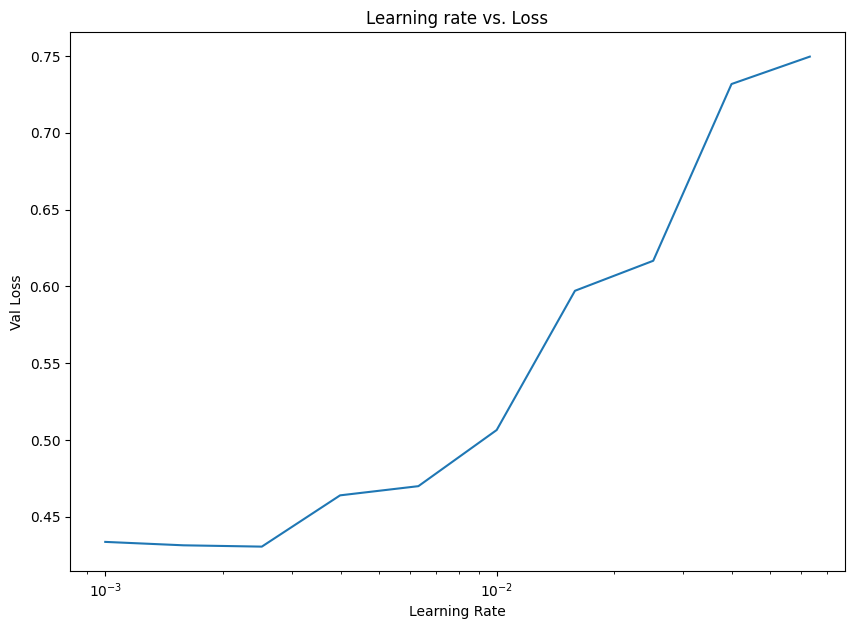

In [ ]:
import matplotlib.pyplot as plt


# Plot the learning rate versus the loss
lrs = 1e-3 * (10 ** (tf.range(10)/5))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_USE_Adam_LR_100_percent_history.history["val_loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Val Loss")
plt.title("Learning rate vs. Loss");

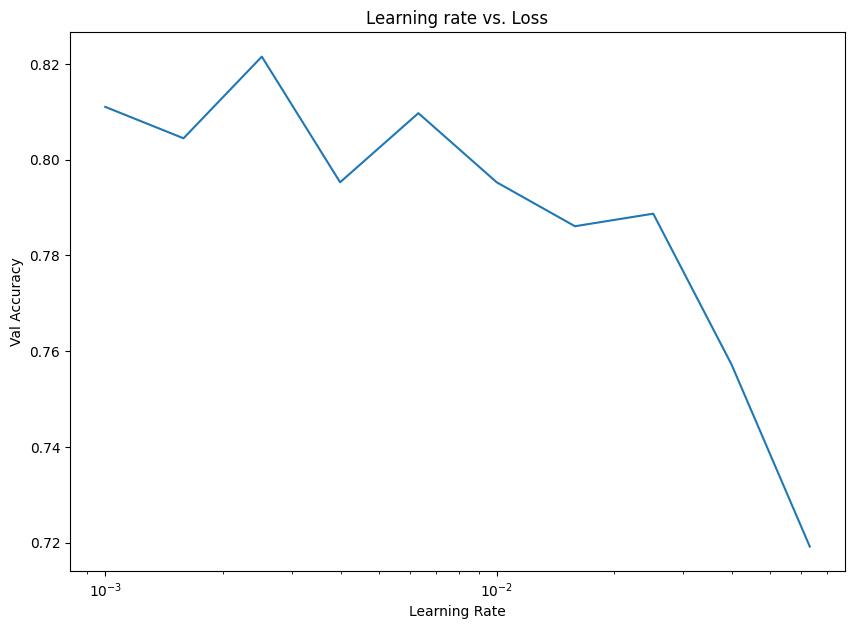

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-3 * (10 ** (tf.range(10)/5))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_USE_Adam_LR_100_percent_history.history["val_accuracy"])
plt.xlabel("Learning Rate")
plt.ylabel("Val Accuracy")
plt.title("Learning rate vs. Loss");

#### Hence, we conclude that the ideal learning rate is  lr=0.0016 as it has the lowest val_loss

Now let us use this value to recreate the model

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_USE_Adam_iLR_100_percent = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_USE_Adam_iLR_100_percent")

# Original lr=0.0025, 0.001 (0.8149987406062964)

# Compile
model_USE_Adam_iLR_100_percent.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
                metrics=["accuracy"])

model_USE_Adam_iLR_100_percent.summary()

Model: "model_USE_Adam_iLR_100_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
# Fit the model to the 100% training data subsets
model_USE_Adam_iLR_100_percent_history = model_USE_Adam_iLR_100_percent.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_Adam_iLR_100_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_Adam_iLR_100_percent_correct_split/20240120-234121
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.4634 - accuracy: 0.7959 - val_loss: 0.4403 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4053 - accuracy: 0.8170 - val_loss: 0.4265 - val_accuracy: 0.8176
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3883 - accuracy: 0.8286 - val_loss: 0.4271 - val_accuracy: 0.8189
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3752 - accuracy: 0.8354 - val_loss: 0.4251 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3605 - accuracy: 0.8427 - val_loss: 0.4301 - val_accuracy: 0.8202


In [ ]:
# Make predictions with the model trained on 100% of the data
model_USE_Adam_iLR_100_percent_pred_probs = model_USE_Adam_iLR_100_percent.predict(val_sentences)
model_USE_Adam_iLR_100_percent_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.14558497],
       [0.74913657],
       [0.9961248 ],
       [0.26533234],
       [0.6484028 ],
       [0.7582646 ],
       [0.9886967 ],
       [0.9898363 ],
       [0.96198803],
       [0.07132525]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_USE_Adam_iLR_100_percent_preds = tf.squeeze(tf.round(model_USE_Adam_iLR_100_percent_pred_probs))
model_USE_Adam_iLR_100_percent_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model_USE_10_percent predictions
model_USE_Adam_iLR_100_percent_preds_results = calculate_results(y_true=val_labels,
                                    y_pred=model_USE_Adam_iLR_100_percent_preds)
model_USE_Adam_iLR_100_percent_preds_results

{'accuracy': 82.02099737532808,
 'precision': 0.8223219905078891,
 'recall': 0.8202099737532809,
 'f1': 0.8188242643827762}

In [ ]:
model_USE_100_percent_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

### Learning rate does makes an increase.

Following methods to consider:

* LSTM

* Batching

* [Augment the data](https://neptune.ai/blog/data-augmentation-nlp) (hardest to do)

### Now let's try add an LSTM layer to our model

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_USE_Adam_LSTM_iLR_100_percent = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Flatten(),
    layers.Reshape((1, -1)),  # Reshape to add a new dimension
    layers.Bidirectional(tf.keras.layers.LSTM(64)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_USE_Adam_LSTM_iLR_100_percent")

# Compile
model_USE_Adam_LSTM_iLR_100_percent.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
                metrics=["accuracy"])

model_USE_Adam_LSTM_iLR_100_percent.summary()

Model: "model_USE_Adam_LSTM_iLR_100_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 reshape_1 (Reshape)         (None, 1, 512)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               295424    
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                               

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
# Fit the model to the 100% training data subsets
model_USE_Adam_LSTM_iLR_100_percent_history = model_USE_Adam_LSTM_iLR_100_percent.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_Adam_LSTM_iLR_100_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_Adam_LSTM_iLR_100_percent_correct_split/20240120-234240
Epoch 1/5
215/215 [==============================] - 9s 16ms/step - loss: 0.4553 - accuracy: 0.8003 - val_loss: 0.4381 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4031 - accuracy: 0.8205 - val_loss: 0.4257 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3889 - accuracy: 0.8283 - val_loss: 0.4230 - val_accuracy: 0.8215
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3769 - accuracy: 0.8365 - val_loss: 0.4234 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3629 - accuracy: 0.8405 - val_loss: 0.4260 - val_accuracy: 0.8189


In [ ]:
# Make predictions with the model trained on 100% of the data
model_USE_Adam_LSTM_iLR_100_percent_pred_probs = model_USE_Adam_LSTM_iLR_100_percent.predict(val_sentences)
model_USE_Adam_LSTM_iLR_100_percent_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.10664782],
       [0.76624167],
       [0.99909914],
       [0.20885518],
       [0.44600883],
       [0.87732106],
       [0.99486524],
       [0.99038434],
       [0.99517006],
       [0.07716962]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_USE_Adam_LSTM_iLR_100_percent_preds = tf.squeeze(tf.round(model_USE_Adam_LSTM_iLR_100_percent_pred_probs))
model_USE_Adam_LSTM_iLR_100_percent_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model_USE_10_percent predictions
model_USE_Adam_LSTM_iLR_100_percent_preds_results = calculate_results(y_true=val_labels,
                                    y_pred=model_USE_Adam_LSTM_iLR_100_percent_preds)
model_USE_Adam_LSTM_iLR_100_percent_preds_results

{'accuracy': 81.88976377952756,
 'precision': 0.8246806372304727,
 'recall': 0.8188976377952756,
 'f1': 0.8164733965877927}

In [ ]:
model_USE_Adam_iLR_100_percent_preds_results

{'accuracy': 82.02099737532808,
 'precision': 0.8223219905078891,
 'recall': 0.8202099737532809,
 'f1': 0.8188242643827762}

### The f1 score is improving, let's try and tune the LSTM Parameters

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_USE_Adam_LSTM_adj_iLR_100_percent = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Flatten(),
    layers.Reshape((1, -1)),  # Reshape to add a new dimension
    layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_USE_Adam_LSTM_adj_iLR_100_percent")

# Compile
model_USE_Adam_LSTM_adj_iLR_100_percent.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
                metrics=["accuracy"])

model_USE_Adam_LSTM_adj_iLR_100_percent.summary()

Model: "model_USE_Adam_LSTM_adj_iLR_100_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 reshape_3 (Reshape)         (None, 1, 512)            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               295424    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                           

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
# Fit the model to the 100% training data subsets
model_USE_Adam_LSTM_adj_iLR_100_percent_history = model_USE_Adam_LSTM_adj_iLR_100_percent.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_Adam_LSTM_adj_iLR_100_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_Adam_LSTM_adj_iLR_100_percent_correct_split/20240120-234334
Epoch 1/5
215/215 [==============================] - 12s 19ms/step - loss: 0.4586 - accuracy: 0.8002 - val_loss: 0.4374 - val_accuracy: 0.8110
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4085 - accuracy: 0.8174 - val_loss: 0.4283 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3968 - accuracy: 0.8243 - val_loss: 0.4222 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3874 - accuracy: 0.8300 - val_loss: 0.4229 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3750 - accuracy: 0.8336 - val_loss: 0.4273 - val_accuracy: 0.8136


In [ ]:
# Make predictions with the model trained on 100% of the data
model_USE_Adam_LSTM_adj_iLR_100_percent_pred_probs = model_USE_Adam_LSTM_adj_iLR_100_percent.predict(val_sentences)
model_USE_Adam_LSTM_adj_iLR_100_percent_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.08407847],
       [0.767007  ],
       [0.99822086],
       [0.23743105],
       [0.4892799 ],
       [0.8168135 ],
       [0.99395716],
       [0.9973557 ],
       [0.9896159 ],
       [0.10586926]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_USE_Adam_LSTM_adj_iLR_100_percent_preds = tf.squeeze(tf.round(model_USE_Adam_LSTM_adj_iLR_100_percent_pred_probs))
model_USE_Adam_LSTM_adj_iLR_100_percent_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model_USE_10_percent predictions
model_USE_Adam_LSTM_adj_iLR_100_percent_preds_results = calculate_results(y_true=val_labels,
                                    y_pred=model_USE_Adam_LSTM_adj_iLR_100_percent_preds)
model_USE_Adam_LSTM_adj_iLR_100_percent_preds_results

{'accuracy': 81.36482939632546,
 'precision': 0.8183059965070674,
 'recall': 0.8136482939632546,
 'f1': 0.8113979495492928}

In [ ]:
model_USE_Adam_iLR_100_percent_preds_results

{'accuracy': 82.02099737532808,
 'precision': 0.8223219905078891,
 'recall': 0.8202099737532809,
 'f1': 0.8188242643827762}

In [ ]:
model_USE_Adam_LSTM_iLR_100_percent_preds_results

{'accuracy': 81.88976377952756,
 'precision': 0.8246806372304727,
 'recall': 0.8188976377952756,
 'f1': 0.8164733965877927}

In [ ]:
# model_USE_Adam_iLR_100_percent_preds_results best so far

### So it appears tuning the model LSTM decrease our F1-score and adding in the LSTM layer has increased our F1-score.
#### Perhaps we can now consider batching

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_USE_Adam_LSTM_batched_iLR_100_percent = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Flatten(),
    layers.Reshape((1, -1)),  # Reshape to add a new dimension
    layers.Bidirectional(tf.keras.layers.LSTM(64)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_USE_Adam_LSTM_batched_iLR_100_percent")

# Compile
model_USE_Adam_LSTM_batched_iLR_100_percent.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
                metrics=["accuracy"])

model_USE_Adam_LSTM_batched_iLR_100_percent.summary()

Model: "model_USE_Adam_LSTM_batched_iLR_100_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 reshape_4 (Reshape)         (None, 1, 512)            0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               295424    
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                       

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
# Fit the model to the 100% training data subsets
# Add early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_USE_Adam_LSTM_batched_iLR_100_percent_history = model_USE_Adam_LSTM_batched_iLR_100_percent.fit(train_sentences,
                                                                                                      train_labels,
                                                                                                      epochs=15,
                                                                                                      batch_size=32,
                                                                                                      validation_data=(val_sentences, val_labels),
                                                                                                      callbacks=[early_stopping])

Epoch 1/15
215/215 [==============================] - 8s 16ms/step - loss: 0.4532 - accuracy: 0.8016 - val_loss: 0.4391 - val_accuracy: 0.8071
Epoch 2/15
215/215 [==============================] - 2s 11ms/step - loss: 0.4043 - accuracy: 0.8184 - val_loss: 0.4268 - val_accuracy: 0.8110
Epoch 3/15
215/215 [==============================] - 2s 11ms/step - loss: 0.3905 - accuracy: 0.8279 - val_loss: 0.4239 - val_accuracy: 0.8163
Epoch 4/15
215/215 [==============================] - 2s 11ms/step - loss: 0.3792 - accuracy: 0.8348 - val_loss: 0.4258 - val_accuracy: 0.8110
Epoch 5/15
215/215 [==============================] - 2s 11ms/step - loss: 0.3672 - accuracy: 0.8383 - val_loss: 0.4301 - val_accuracy: 0.8202
Epoch 6/15
215/215 [==============================] - 2s 11ms/step - loss: 0.3487 - accuracy: 0.8467 - val_loss: 0.4384 - val_accuracy: 0.8110


In [ ]:
# Make predictions with the model trained on 100% of the data
model_USE_Adam_LSTM_batched_iLR_100_percent_pred_probs = model_USE_Adam_LSTM_batched_iLR_100_percent.predict(val_sentences)
# Turn pred probs into labels
model_USE_Adam_LSTM_batched_iLR_100_percent_preds = tf.squeeze(tf.round(model_USE_Adam_LSTM_batched_iLR_100_percent_pred_probs))
# Evaluate model_USE_10_percent predictions
model_USE_Adam_LSTM_batched_iLR_100_percent_preds_results = calculate_results(y_true=val_labels,
                                    y_pred=model_USE_Adam_LSTM_batched_iLR_100_percent_preds)
model_USE_Adam_LSTM_batched_iLR_100_percent_preds_results

24/24 [==============================] - 1s 8ms/step


{'accuracy': 81.10236220472441,
 'precision': 0.8160249566261846,
 'recall': 0.8110236220472441,
 'f1': 0.8086192437519291}

In [ ]:
model_USE_Adam_LSTM_iLR_100_percent_preds_results

{'accuracy': 81.88976377952756,
 'precision': 0.8246806372304727,
 'recall': 0.8188976377952756,
 'f1': 0.8164733965877927}

In [ ]:
model_USE_Adam_iLR_100_percent_preds_results

{'accuracy': 82.02099737532808,
 'precision': 0.8223219905078891,
 'recall': 0.8202099737532809,
 'f1': 0.8188242643827762}

In [ ]:
model_USE_Adam_LSTM_adj_iLR_100_percent_preds_results

{'accuracy': 81.36482939632546,
 'precision': 0.8183059965070674,
 'recall': 0.8136482939632546,
 'f1': 0.8113979495492928}

In [ ]:
# model_USE_Adam_iLR_100_percent_preds_results best so far

### Hence, we can conclude that batching doesn't seem to work that well in this case as the ideal learning rate went down. The best model so far is:

#### model_USE_Adam_iLR_100_percent


### Other ideas:
- [Augment the data](https://www.youtube.com/watch?v=lpWewl7y57o)
- Stacking LSTM layers?
- Try add in a GRU layer?

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_USE_Adam_GRU_iLR_100_percent = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Flatten(),
    layers.Reshape((1, -1)),  # Reshape to add a new dimension
    layers.GRU(32),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_USE_Adam_GRU_iLR_100_percent")

# Compile
model_USE_Adam_GRU_iLR_100_percent.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
                metrics=["accuracy"])

model_USE_Adam_GRU_iLR_100_percent.summary()

Model: "model_USE_Adam_GRU_iLR_100_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 reshape_5 (Reshape)         (None, 1, 512)            0         
                                                                 
 gru (GRU)                   (None, 32)                52416     
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 256851329 (979.81 

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
# Fit the model to the 100% training data subsets
model_USE_Adam_GRU_iLR_100_percent_history = model_USE_Adam_GRU_iLR_100_percent.fit(train_sentences,
                              train_labels,
                              epochs=15,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_Adam_GRU_iLR_100_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_Adam_GRU_iLR_100_percent_correct_split/20240120-234547
Epoch 1/15
215/215 [==============================] - 7s 14ms/step - loss: 0.4633 - accuracy: 0.7977 - val_loss: 0.4324 - val_accuracy: 0.8071
Epoch 2/15
215/215 [==============================] - 2s 10ms/step - loss: 0.4052 - accuracy: 0.8192 - val_loss: 0.4237 - val_accuracy: 0.8123
Epoch 3/15
215/215 [==============================] - 2s 10ms/step - loss: 0.3936 - accuracy: 0.8264 - val_loss: 0.4242 - val_accuracy: 0.8163
Epoch 4/15
215/215 [==============================] - 2s 10ms/step - loss: 0.3843 - accuracy: 0.8313 - val_loss: 0.4228 - val_accuracy: 0.8163
Epoch 5/15
215/215 [==============================] - 2s 10ms/step - loss: 0.3771 - accuracy: 0.8320 - val_loss: 0.4306 - val_accuracy: 0.8136
Epoch 6/15
215/215 [==============================] - 2s 10ms/step - loss: 0.3677 - accuracy: 0.8371 - val_loss: 0.4292 - val_accuracy: 0.8136
Epoch 7/15
215/215 

In [ ]:
# Make predictions with the model trained on 100% of the data
model_USE_Adam_GRU_iLR_100_percent_pred_probs = model_USE_Adam_GRU_iLR_100_percent.predict(val_sentences)
model_USE_Adam_GRU_iLR_100_percent_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.08994517],
       [0.39133418],
       [0.9999999 ],
       [0.18805008],
       [0.09076053],
       [0.9989636 ],
       [0.9996474 ],
       [0.99996424],
       [0.9999491 ],
       [0.12714817]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_USE_Adam_GRU_iLR_100_percent_preds = tf.squeeze(tf.round(model_USE_Adam_GRU_iLR_100_percent_pred_probs))
model_USE_Adam_GRU_iLR_100_percent_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model_USE_10_percent predictions
model_USE_Adam_GRU_iLR_100_percent_preds_results = calculate_results(y_true=val_labels,
                                    y_pred=model_USE_Adam_GRU_iLR_100_percent_preds)
model_USE_Adam_GRU_iLR_100_percent_preds_results

{'accuracy': 78.74015748031496,
 'precision': 0.791897156051696,
 'recall': 0.7874015748031497,
 'f1': 0.7845557264291478}

In [ ]:
model_USE_Adam_LSTM_iLR_100_percent_preds_results

{'accuracy': 81.88976377952756,
 'precision': 0.8246806372304727,
 'recall': 0.8188976377952756,
 'f1': 0.8164733965877927}

In [ ]:
# model_USE_Adam_iLR_100_percent_preds_results best so far
model_USE_Adam_iLR_100_percent_preds_results

{'accuracy': 82.02099737532808,
 'precision': 0.8223219905078891,
 'recall': 0.8202099737532809,
 'f1': 0.8188242643827762}

## Now let us test the USE_true model on 100% of the dataset on the test dataset.

In [ ]:
test_df["text"]

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [ ]:
# type(test_df["text"])

In [ ]:
test_sentences = test_df["text"].to_numpy()
test_sentences[:5]

array(['Just happened a terrible car crash',
       'Heard about #earthquake is different cities, stay safe everyone.',
       'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       'Apocalypse lighting. #Spokane #wildfires',
       'Typhoon Soudelor kills 28 in China and Taiwan'], dtype=object)

In [ ]:
# Use trained baseline model to make predictions on the test dataset
# Make predictions
model_USE_Adam_iLR_100_percent_probs = model_USE_Adam_iLR_100_percent.predict(test_sentences)
model_USE_Adam_iLR_100_percent_probs[:20]

102/102 [==============================] - 1s 7ms/step


array([[0.45712453],
       [0.93484926],
       [0.7936757 ],
       [0.9468036 ],
       [0.9806835 ],
       [0.70630556],
       [0.06725465],
       [0.01835823],
       [0.04083119],
       [0.03524281],
       [0.08198759],
       [0.08505842],
       [0.04829344],
       [0.1467104 ],
       [0.01455801],
       [0.8908288 ],
       [0.32808328],
       [0.40472415],
       [0.08724011],
       [0.23129758]], dtype=float32)

In [ ]:
# Convert model prediction probabilities to label format
model_USE_Adam_iLR_100_percent_preds = np.array(model_USE_Adam_iLR_100_percent_probs)
model_USE_Adam_iLR_100_percent_preds = np.round(model_USE_Adam_iLR_100_percent_preds).astype(int)
model_USE_Adam_iLR_100_percent_preds = [j[0] for j in model_USE_Adam_iLR_100_percent_preds]
model_USE_Adam_iLR_100_percent_preds[:20]

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
# len(model_USE_trainable_true_preds)

In [ ]:
test_df["id"].to_numpy()

array([    0,     2,     3, ..., 10868, 10874, 10875])

In [ ]:
len(test_df["id"].to_numpy())

3263

In [ ]:
len(model_USE_Adam_iLR_100_percent_preds)

3263

In [ ]:
# format the predictions into the same format as the sample_submission.csv file from Kaggle
# (see the Files tab in Colab for what the sample_submission.csv file looks like)
import pandas as pd
data = {"id": test_df["id"].to_numpy(),
        "target": model_USE_Adam_iLR_100_percent_preds}
prediction_df = pd.DataFrame(data)
prediction_df.to_csv("submission.csv", index=False)